In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

几种常见的Tensor

* Const(常量)

* Variable(变量)

* Placeholder(占位符)

In [2]:
constant = tf.constant([1, 2, 3, 4, 5, 6, 7], dtype=tf.float32)

print("constant:", constant)

variable = tf.Variable(1.)

print("variable:", variable)

variable2 = tf.Variable(constant + 1)

print("variable2:", variable2)

placeholder = tf.placeholder(tf.float32, None)

print("placeholder:", placeholder)

result = constant + variable + variable2 + placeholder

print("result:", result)

with tf.Session() as session:
    # 初始化变量
    session.run(tf.global_variables_initializer())
    placeholder_data = 10.
    print(session.run(result, feed_dict={placeholder: placeholder_data}))

constant: Tensor("Const:0", shape=(7,), dtype=float32)
Instructions for updating:
Colocations handled automatically by placer.
variable: <tf.Variable 'Variable:0' shape=() dtype=float32_ref>
variable2: <tf.Variable 'Variable_1:0' shape=(7,) dtype=float32_ref>
placeholder: Tensor("Placeholder:0", dtype=float32)
result: Tensor("add_3:0", dtype=float32)
[14. 16. 18. 20. 22. 24. 26.]


(5528, 3685, 3)


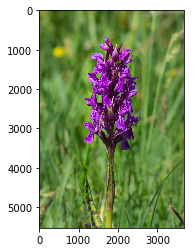

In [3]:
# 读取图片矩阵
raw_image_data = mpimg.imread("/Users/zc/Downloads/MarshOrchid.jpg")
print(raw_image_data.shape)
plt.imshow(raw_image_data)
plt.show()

(3685, 5528, 3)


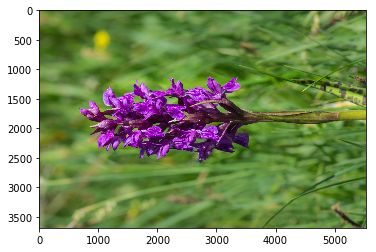

In [4]:
# 转置
x = tf.Variable(raw_image_data, name='x')
x = tf.transpose(x, perm=[1, 0, 2])
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    result = session.run(x)
    print(result.shape)
    plt.imshow(result)
    plt.show()

Instructions for updating:
batch_dim is deprecated, use batch_axis instead
(5528, 3685, 3)


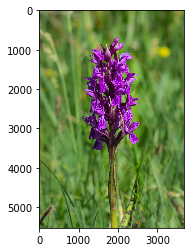

In [5]:
# 翻转
image = tf.placeholder("uint8", [None,None,3])
height, width, depth = raw_image_data.shape
reverse_sequence = tf.reverse_sequence(image, [width] * height, 1, batch_dim=0)
with tf.Session() as session:
    result = session.run(reverse_sequence, feed_dict={image: raw_image_data})
print(result.shape)
plt.imshow(result)
plt.show()

(3000, 3685, 3)


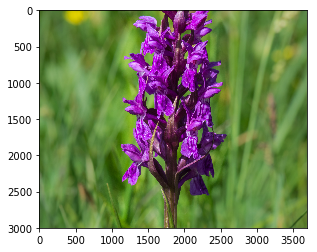

In [6]:
# 切片
image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [1000, 0, 0], [3000, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

(3001, 3685, 3)


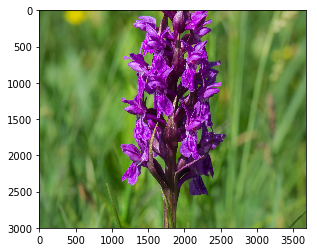

In [7]:
# 切片运算符
image = tf.placeholder("uint8", [None, None, 3])
slice = image[1000:4001,:,:]

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()